EE21S061 Arihant Jain Lab 1 for EE5175 course:



In [1]:
!pip install numpy
!pip install pillow
!pip install matplotlib

Setting up the environment we will be using pillow to access the image and numpy to perform the arthimetic operation on the image and also going to be using matplotlib to visualize the changes done to the image.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [18, 7] 

Setting up preferred size of the graph we will be using to visualize the images.

In [3]:
from PIL import Image
from numpy import asarray

# load the image
pisa = Image.open('pisa_rotate.png')
lena = Image.open('lena_translate.png')
cells = Image.open('cells_scale.png')


Loading in the image as they are in the same directory we can easily load then using Image object from pillow library as given above

In [5]:
import math
import numpy as np

Q2.Rotate the given image (pisa rotate.png) about the image centre, so as to straighten the
Pisa tower.

In [6]:
theta = np.radians(-4)
c, s = np.cos(theta), np.sin(theta)
#Calculating the argument in the Rotaion Matrix

We have now imported the numpy and math to operate on the image. Also calculated the Rotation matrix element assuming the angle of 4 degrees.
I read online that leaning tower of pisa is tilted at a 3.99 degree so for this task i will be assuming the correction angle to be 4 degrees but it can be changed if neccessary to see how it would affect the image.

In [8]:
#PISA Image Rotation 
source=pisa
#I used data as a placeholder for all the operation and data2 and data3 as post processed images so changing source name here with any other image should work

We have loaded the image using Image function from pillow library to work on it i decided to change it to a numpy array
so the idea is that before processing the image its changed to numpy array and after the operation it is changed back into a PIL image object to be displayed.

In [9]:
type(pisa)

PIL.PngImagePlugin.PngImageFile

The first task i decided to tackle was Rotation so here the first approach is to go from source to target.

The issue we would face is non-integer values as output, As pixels are equally spaced we need to assign a pixel fractional co-ordinate to another pixel co-ordinate in target which is close to it.

We can do this in 2 ways assign the fraction pixel to ceil of the co-ordinates or floor of the co-ordinate here we have done both.


<class 'numpy.ndarray'>
(482, 207)


Text(0.5, 1.0, 'Using roundoff')

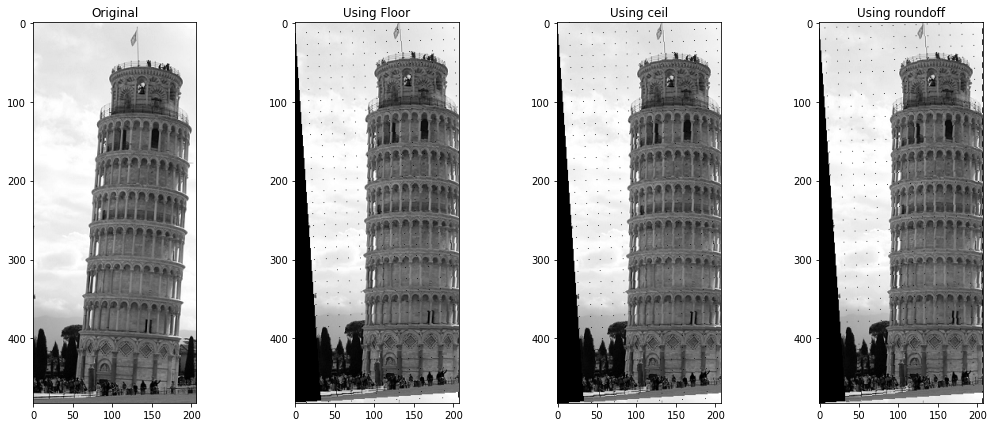

In [10]:
data = asarray(source)
#casting the image as a numpy array and storing it in data
print(type(data))
print(data.shape)
#Looking at the type and shape of the numpy array we obtained shape gives us the image dimension which are then fed into the algorithm to avoid out of bound pixel locations.

#Created another numpy array of same size as the image filled with zeros 
data2=np.zeros_like(data)
data3=np.zeros_like(data)
data4=np.zeros_like(data)
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        #iterating through each pixel in the source image and checking for valid co-ordinates
        #valid co-ordinates are those who fall under the dimension of target image otherwise they are outside the view.
        if (math.floor(c*xs+s*ys)>data.shape[0]-1) or (math.floor(-s*xs+c*ys)>data.shape[1]-1):
            continue
        #using floor to resolve fractional co-ordinate issue here
        data2[math.floor(c*xs+s*ys)][math.floor(-s*xs+c*ys)]=data[xs][ys]
        #similarly for ceil we can do the same 
        #using ceil to resolve fractional co-ordinate issue here
        if (math.ceil(c*xs+s*ys)>data.shape[0]-1) or (math.ceil(-s*xs+c*ys)>data.shape[1]-1):
            continue
        data3[math.ceil(c*xs+s*ys)][math.ceil(-s*xs+c*ys)]=data[xs][ys]
        data4[round(c*xs+s*ys)][round(-s*xs+c*ys)]=data[xs][ys]

image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)
image4 = Image.fromarray(data4)
#converted back the image from numpy array to Pillow image object to visualize.


figure, axis = plt.subplots(1, 4)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('Original')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('Using Floor')
axis[2].imshow(image3,cmap="gray")
axis[2].set_title('Using ceil')
axis[3].imshow(image4,cmap="gray")
axis[3].set_title('Using roundoff')
#setting up a 1*4 plot to show original, floor image,ceil image.

Looking at the result of Source to Target Transformation we can see that that there are dots spread accross the 3 image this is because of the fact that we are trying to assign a pixel to a nearby pixel based on ceil or floor approach so during these transformation we might skip certain pixel and this is the reason behind the black dots over the images.

Also we can see a that there are a bunch of undefined pixel in the bottom right side of the image as these pixel are based on pixels outside the scope of the original image enough information is not known to account for them.

In [11]:

total_pixels=data.shape[0]*data.shape[1]
base_zeros=np.count_nonzero(data==0)
holes2=np.count_nonzero(data2==0)-base_zeros
holes3=np.count_nonzero(data3==0)-base_zeros
holes4=np.count_nonzero(data3==0)-base_zeros
print("total number of pixels in the image = ",total_pixels)
print("number of undefined pixels (for floor) = ",holes2," loss in image data (approx) = " ,holes2/total_pixels,"%")
print("number of undefined pixels (for ceil) = ",holes3," loss in image data (approx) = " ,holes3/total_pixels,"%")
print("number of undefined pixels (for roundoff) = ",holes4," loss in image data (approx) = " ,holes3/total_pixels,"%")
#calculated the number of unassigned pixel in the target image and then saw the loss in data which is to say how many pixels now dont have information.

total number of pixels in the image =  99774
number of undefined pixels (for floor) =  8223  loss in image data (approx) =  0.0824162607492934 %
number of undefined pixels (for ceil) =  8695  loss in image data (approx) =  0.0871469521117726 %
number of undefined pixels (for roundoff) =  8695  loss in image data (approx) =  0.0871469521117726 %


Just checking up the stats of the image data we have after post processing.

In [12]:
def bilin(xs,ys):
        #This function takes fraction co-ordinate for source image based on target to source matrix and then uses bilinear interpolation to calculated the value of the given target co-ordinate
        xs_c=math.ceil(xs)
        ys_c=math.ceil(ys)
        xs_f=math.floor(xs)
        ys_f=math.floor(ys)
        a=ys-ys_f
        b=xs-xs_f
        #Above we calculate all necessary values to perform bilinear interpolation
        if (xs<0 or ys<0 or xs>data.shape[0]-1 or ys>data.shape[1]-1):
            #to account for the fact that this function may sometimes receive invalid co-ordinate such as negative or beyond image dimensions
            return False
        return (((1-a)*(1-b)*data[xs_f][ys_f])+((a)*(1-b)*data[xs_f+1][ys_f])+((1-a)*(b)*data[xs_f][ys_f+1])+((a)*(b)*data[xs_f+1][ys_f+1]))

Defined a bilin function this function takes in input as the source co-ordinate of the original image which is 

<class 'numpy.ndarray'>
(482, 207)


Text(0.5, 1.0, 'Bilinear Interpolation')

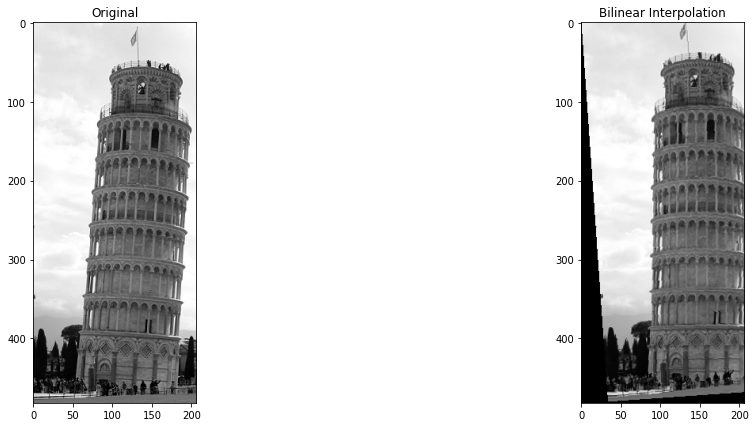

In [13]:
source=pisa
data = asarray(source)
print(type(data))
print(data.shape)
#again we open the image but this time we iterate through the target co-ordinates

data2=np.zeros_like(data)
for xt in range(data.shape[0]):
    for yt in range(data.shape[1]):
        #This time we are iterating through target pixel which means all pixel in the target image are accounted for. This takes care of the black dot issue in the previous image.
        xs=c*xt-s*yt
        ys=s*xt+c*yt
        #based on the rotation matrix we calculate for source co-ordinate and then pass it to bilin function we created before.
        temp=bilin(xs,ys)
        if (temp):
            data2[xt][yt]=temp
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
#converted back the image from numpy array to Pillow image object to visualize.

figure, axis = plt.subplots(1, 2)
axis[0].imshow(image,cmap="gray")
axis[0].set_title('Original')
axis[1].imshow(image2,cmap="gray")
axis[1].set_title('Bilinear Interpolation')
#setting up a 1*2 plot to show original, floor image,ceil image.

Based on Bilinear approach we can see much improvement from the source to target method. This tackles the issue of undefined valus in target image and also account for better quality as each pixel is evaluated based on its distance from the calculated fraction co-ordinate system. This handles issue of insufficent information by using its neighbouring cells to get better quality



In [14]:

total_pixels=data.shape[0]*data.shape[1]
base_zeros=np.count_nonzero(data==0)
holes2=np.count_nonzero(data2==0)-base_zeros
print("total number of pixels in the image = ",total_pixels)
print("number of undefined pixels (for floor) = ",holes2," loss in image data (approx) = " ,holes2/total_pixels,"%")
#calculated the number of unassigned pixel in the target image and then saw the loss in data which is to say how many pixels now dont have information.

total number of pixels in the image =  99774
number of undefined pixels (for floor) =  9434  loss in image data (approx) =  0.0945536913424339 %


Q1.Translate the given image (lena translate.png) by (tx = 3.75, ty = 4.3) pixels?

Starting again from Source to Target as the first step

In [15]:
tx=3.75
ty=4.3
#setting up the translation matrix

<class 'numpy.ndarray'>
(256, 256)


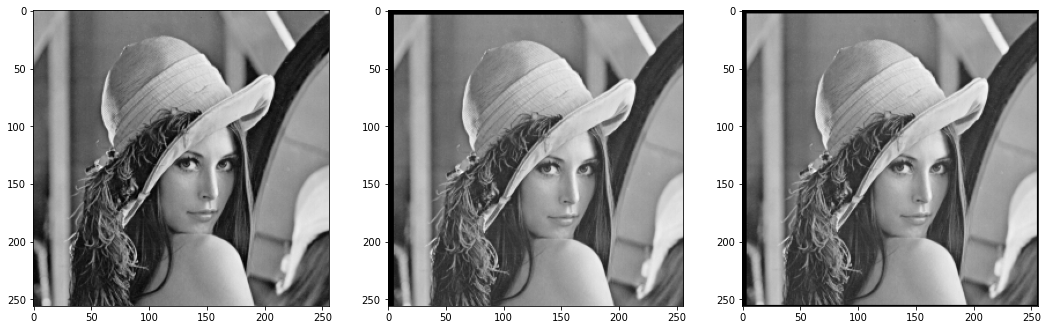

In [16]:
source=lena
data = asarray(source)
print(type(data))
print(data.shape)
#again opening up the image and making zero filled array of its size to store post processed image
data2=np.zeros_like(data)
data3=np.zeros_like(data2)
for xs in range(data.shape[0]):
    for ys in range(data.shape[1]):
        #iterating through source co-ordinates.
        xt=xs+tx
        yt=ys+ty
        #adding translation to source co-ordinate
        if (xt<0 or yt<0 or xt>data.shape[0]-1 or yt>data.shape[1]-1):
            #to check for out of bounds issue as shifting would make some pixel move out of dimenstion of the image.
            continue
        
        #using ceil to resolve fractional co-ordinate issue here
        data2[math.ceil(xt)][math.ceil(yt)]=data[xs][ys]
        
        #using floor to resolve fractional co-ordinate issue here
        data3[math.floor(xt)][math.floor(yt)]=data[xs][ys]
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)
image3 = Image.fromarray(data3)

figure, axis = plt.subplots(1, 3)
axis[0].imshow(image,cmap="gray")
axis[1].imshow(image2,cmap="gray")
axis[2].imshow(image3,cmap="gray")

We can see unlike the rotation task we do not see any black dots here and the reason for that is this is a global translation meaning every point shifts a certain distance this means even if we use ceil or floor. Every point would still just shift to the closest pixel not leaving behind any spots.

Translation of 3.75 with ceil() would become 4 and with floor() would become 3

Translation of 4.3 with ceil() would become 5 and with floor() would become 4

This means we already know that depending upon the approach the row or column which would be lost is in the left side and top side of the image as its a global shift of interger values.

In [16]:

total_pixels=data.shape[0]*data.shape[1]
base_zeros=np.count_nonzero(data==0)
holes2=np.count_nonzero(data2==0)-base_zeros
holes3=np.count_nonzero(data3==0)-base_zeros
print("total number of pixels in the image = ",total_pixels)
print("number of undefined pixels (for floor) = ",holes2," loss in image data (approx) = " ,holes2/total_pixels,"%")
print("number of undefined pixels (for ceil) = ",holes3," loss in image data (approx) = " ,holes3/total_pixels,"%")
#calculated the number of unassigned pixel in the target image and then saw the loss in data which is to say how many pixels now dont have information.

total number of pixels in the image =  65536
number of undefined pixels (for floor) =  2284  loss in image data (approx) =  0.03485107421875 %
number of undefined pixels (for ceil) =  2284  loss in image data (approx) =  0.03485107421875 %


<class 'numpy.ndarray'>
(256, 256)


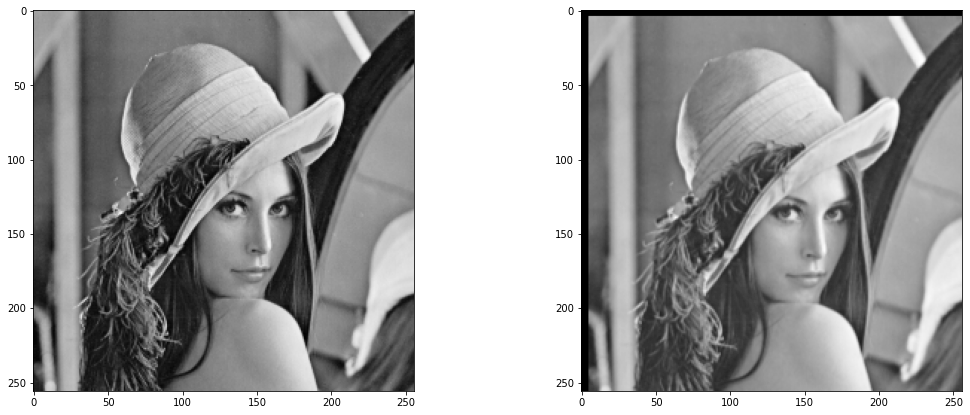

In [17]:
source=lena
data = asarray(source)
print(type(data))
print(data.shape)

tx=3.75
ty=4.3

data2=np.zeros_like(data)
data3=np.zeros_like(data2)
for xt in range(data.shape[0]):
    for yt in range(data.shape[1]):
        xs=xt-tx
        ys=yt-ty
        temp=bilin(xs,ys)
        if (temp):
            data2[xt][yt]=temp
        
image=Image.fromarray(data)
image2 = Image.fromarray(data2)

figure, axis = plt.subplots(1, 2)
axis[0].imshow(image,cmap="gray")
axis[1].imshow(image2,cmap="gray")